## Predicting H1N1 Vaccine Hesitancy:A MachineLearning Approach

## Overview  

This project analyzes vaccine **hesitancy** using data from the **National Flu Survey (NHFS 2009)** to predict which individuals were unlikely to receive the **H1N1 vaccine**. Understanding the reasons behind vaccine hesitancy is essential for shaping effective public health strategies, especially in addressing future pandemics like **COVID-19**.  

Key factors influencing hesitancy include **doctor recommendations, health insurance status, perceived vaccine effectiveness, and risk perception**. By identifying these patterns, public health officials can develop targeted interventions to improve vaccination rates.  

To achieve this, six machine learning models were tested: **Decision Tree Classifier, Logistic Regression, Random Forest, K-Nearest Neighbors, Gradient Boosting Classifier, and XGBoost**. Among them, the **Gradient Boosting Classifier** demonstrated the highest **accuracy and precision**, making it the most effective model for predicting vaccine hesitancy.


## Business Problem  

Despite strong medical evidence supporting vaccines, **vaccine hesitancy** has increased, leading to **declining immunization rates** and a higher risk of **disease outbreaks**. Understanding why individuals choose not to get vaccinated is crucial for developing effective public health interventions.  

This project aims to predict **who is most likely to be hesitant about receiving the H1N1 vaccine** and uncover the key factors driving this hesitancy. By identifying these individuals, public health officials can design targeted strategies to **increase vaccine acceptance** and **improve overall immunization rates**.  

To achieve this, multiple **machine learning models** were used to classify individuals based on their likelihood of vaccine hesitancy. The models were evaluated using key metrics such as **accuracy, precision, recall, ROC curves, and confusion matrices** to ensure reliable and actionable predictions.


## Business Understanding  

### **End Users**  
The primary users of this model are **public health officials**, who can leverage the insights to develop targeted vaccination campaigns and address vaccine hesitancy more effectively.  

### **Business Problem**  
This project focuses on predicting **vaccine hesitancy** rather than just vaccination status. The goal is to identify individuals **unlikely to receive the H1N1 vaccine** and determine the **key factors influencing their decision**. By understanding these factors, public health officials can implement strategies to improve vaccine acceptance and reduce hesitancy.  

### **Risk Context**  
Machine learning predictions come with challenges, particularly **false negatives and false positives**:  
- **False Negatives**: Hesitant individuals mistakenly classified as likely to get vaccinated, leading to missed opportunities for targeted outreach.  
- **False Positives**: Individuals incorrectly classified as hesitant, potentially diverting resources from those who need intervention the most.  

### **Key Metrics**  
To ensure the model provides **reliable and actionable insights**, it prioritizes the following metrics:  
- **Accuracy** – Measures overall correctness of predictions.  
- **Precision** – Reduces false positives, ensuring that outreach efforts focus on truly hesitant individuals.  
- **Recall** – Captures hesitant individuals who might otherwise be overlooked.  
- **F1-Score** – Balances precision and recall for a more effective classification approach.  

By optimizing these metrics, the model helps **public health officials make data-driven decisions** to increase vaccine uptake and improve public health outcomes.  


In [5]:
# Importing Relevant Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import category_encoders as ce

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import RocCurveDisplay

from sklearn.metrics import confusion_matrix

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

import xgboost     # extreme gradient boosting


In [6]:

import os

# Data Directory
data_dir = "C:/Users/WAMBUI/Downloads"


# File paths
features_path = os.path.join(data_dir, "training_set_features.csv")
labels_path = os.path.join(data_dir, "training_set_labels.csv")
test_path = os.path.join(data_dir, "test_set_features.csv")
submission_path = os.path.join(data_dir, "submission_format.csv")

# Load datasets
features_df = pd.read_csv(features_path)
labels_df = pd.read_csv(labels_path)
test_df = pd.read_csv(test_path)
submission_df = pd.read_csv(submission_path)
# Merge training features with labels using 'respondent_id' as the common key
df = features_df.merge(labels_df, on="respondent_id")
# Data frame 
df


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [7]:
# Getting df info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [8]:
# Getting number of null values
df.isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [9]:
#statistical infrences 
# Explore numerical columns
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [10]:
#object exploration in columns
df[[c for c in df.columns if df[c].dtype =='object']].describe()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
count,26707,25300,26707,26707,22284,25299,24665,25244,26707,26707,13377,13237
unique,5,4,4,2,3,2,2,3,10,3,21,23
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",fcxhlnwr,xtkaffoo
freq,6843,10097,21222,15858,12777,13555,18736,13560,4297,11645,2468,1778


I chose H1N1 vaccination rate as the target variable since many features in the dataset are directly related to it. However, the dataset has a class imbalance issue, which I addressed in this project

## Target Variable Selection  

For this project, I selected **H1N1 vaccine hesitancy** as the target variable because many features in the dataset are directly related to factors influencing vaccination decisions. Understanding these factors is crucial for predicting individuals who are unlikely to get vaccinated and addressing vaccine hesitancy through targeted interventions.  

However, the dataset presented a **class imbalance issue**, meaning there were significantly more individuals who did not receive the vaccine compared to those who did. To ensure fair and accurate predictions, I implemented techniques to address this imbalance and improve the model's reliability.


## EXPLARATORY DATA ANALYSIS
The following visualizations represent the top four most influential features in determining vaccination status for H1N1. 

In [13]:
# Making a copy of main dataframe to use for visualizations
df2 = df.copy()

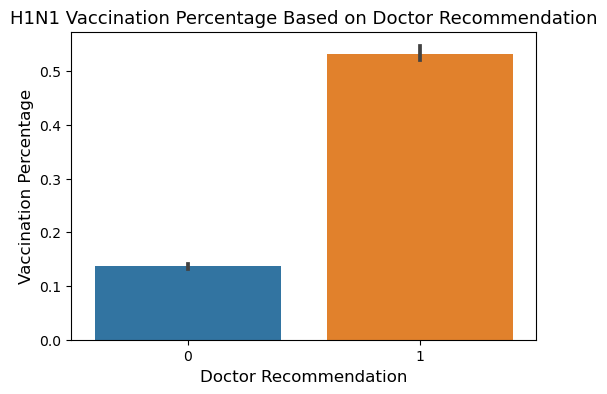

In [14]:
# Graph to show corelation between H1N1 vaccination and Doctor recommendation

# Create the bar plot
plt.figure(figsize=(6, 4)) 
dr = sns.barplot(x=df2['doctor_recc_h1n1'].dropna().astype(int), y=df2['h1n1_vaccine'])

# Set labels and title
dr.set_xlabel('Doctor Recommendation', fontsize=12)
dr.set_ylabel('Vaccination Percentage', fontsize=12)
dr.set_title('H1N1 Vaccination Percentage Based on Doctor Recommendation', fontsize=13)

# Show the plot
plt.show()



In [15]:
#indicator mapping for the X axis
ins_dict = {1: 'Health Insurance',
           0: 'No Health Insurance'}

In [16]:
# create new column and replace values from health_insurance
df2['health_ins_words'] = df2['health_insurance'].replace(ins_dict)
df2

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine,health_ins_words
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0,Health Insurance
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1,Health Insurance
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0,NaN
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0,Health Insurance
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0,No Health Insurance


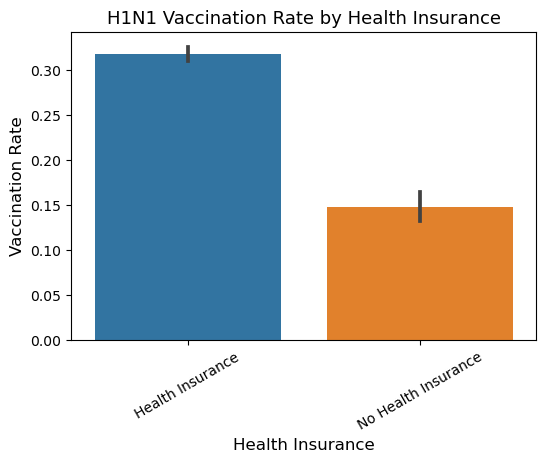

In [17]:
#       
# Create the bar plot
plt.figure(figsize=(6, 4))  # Adjust figure size
ins = sns.barplot(x=df2['health_ins_words'], y=df2['h1n1_vaccine'], estimator=lambda y: sum(y) / len(y))

# Set labels and title
ins.set_xlabel('Health Insurance', fontsize=12)
ins.set_ylabel('Vaccination Rate', fontsize=12)
ins.set_title('H1N1 Vaccination Rate by Health Insurance', fontsize=13)

# Show the plot
plt.xticks(rotation=30) 
plt.show()


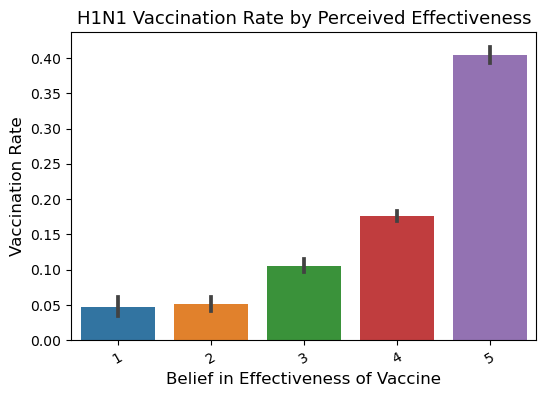

In [18]:
#Impact of Vaccine Effectiveness Perception on H1N1 Vaccination Rates graph
# Create the bar plot
plt.figure(figsize=(6, 4))  # Adjust figure size
ins = sns.barplot(
    x=df2['opinion_h1n1_vacc_effective'].dropna().astype(int),  # Ensure x-axis is categorical
    y=df2['h1n1_vaccine'], 
    estimator=lambda y: sum(y) / len(y)  # Compute the mean vaccination rate
)

 #Set labels and title
ins.set_xlabel('Belief in Effectiveness of Vaccine', fontsize=12)
ins.set_ylabel('Vaccination Rate', fontsize=12)
ins.set_title('H1N1 Vaccination Rate by Perceived Effectiveness', fontsize=13)

# Show the plot
plt.xticks(rotation=30)  # Rotate x-axis labels if needed
plt.show()

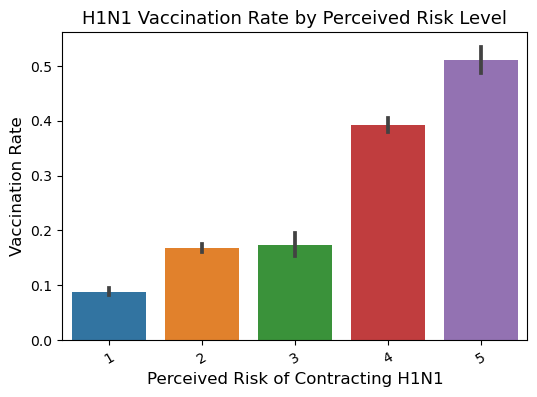

In [19]:
#Impact of Perceived H1N1 Risk on Vaccination Rates
# Create the bar plot
plt.figure(figsize=(6, 4))  
ins = sns.barplot(
    x=df2['opinion_h1n1_risk'].dropna().astype(int),  
    y=df2['h1n1_vaccine'], 
    estimator=lambda y: sum(y) / len(y)  
)

# Set labels and title
ins.set_xlabel('Perceived Risk of Contracting H1N1', fontsize=12)
ins.set_ylabel('Vaccination Rate', fontsize=12)
ins.set_title('H1N1 Vaccination Rate by Perceived Risk Level', fontsize=13)

# Show the plot
plt.xticks(rotation=30)  # Rotate x-axis labels if needed
plt.show()

## Data Preparation
I made several modifications to the dataset to ensure effective preprocessing and modeling. I dropped "respondent_id" and "seasonal_vaccine" as they were not relevant to the analysis. Categorical variables were transformed using OneHotEncoder, and missing values were filled using Iterative Imputer, which provided better accuracy than a simple imputer. For categorical columns with more than 10 unique values, I used CountEncoder to replace category names with frequency counts.

To streamline preprocessing and prevent data leakage, I implemented pipelines for both data transformation and modeling. I also split the training and testing data twice to retain a holdout set for final model evaluation and generalizability testing

In [21]:
#Define X and Y
X = df.drop(columns=['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], axis=1)
y = df['h1n1_vaccine']


#train Data 
from sklearn.model_selection import train_test_split

# Train - Holdout Set Split
X_train, X_hold, y_train, y_hold = train_test_split(
    X, y, 
    test_size=0.1,   
    random_state=42,  
    stratify=y        
)




In [22]:
# Set up lists for each column's data type
num_cols = []  
ohe_cols = []   
freq_cols = []  

# Categorize columns based on data type 
for col in X.columns:
    if X[col].dtype in ['float64', 'int64']: 
        num_cols.append(col)
    elif X[col].nunique() < 10:  
        ohe_cols.append(col)
    else:  # (Frequency Encoding)
        freq_cols.append(col)
print("Numeric Columns:", num_cols)
print("One-Hot Encoded Columns:", ohe_cols)
print("Frequency Encoded Columns:", freq_cols)


Numeric Columns: ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']
One-Hot Encoded Columns: ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'census_msa']
Frequency Encoded Columns: ['hhs_geo_region', 'employment_industry', 'employment_occupation']


In [23]:
#Data Pre-processing 
# Numeric Data Transformer
num_transformer = Pipeline(steps=[
    ('num_imputer', IterativeImputer(max_iter=100, random_state=42)),  
    ('minmaxscaler', MinMaxScaler())  # Scale features between 0 and 1
])

# One-Hot Encoding Transformer for Low Cardinality Categories
ohe_transformer = Pipeline(steps=[
    ('ohe_imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),  
    ('ohe_encoder', OneHotEncoder(handle_unknown='ignore'))  # Convert categories into binary columns
])

# Frequency Encoding Transformer for High Cardinality Categories
freq_transformer = Pipeline(steps=[
    ('freq_encoder', ce.CountEncoder(normalize=True, min_group_size=0.05)),  # Convert categories to frequency counts
    ('freq_imputer', IterativeImputer(max_iter=100, random_state=42))  
])

# Preprocessor defined using ColumnTransformer by packaging the all components together
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('ohe', ohe_transformer, ohe_cols),
        ('freq', freq_transformer, freq_cols)
    ])

# Fit the preprocessor to the training data
preprocessor.fit(X_train)


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num_imputer',
                                                  IterativeImputer(max_iter=100,
                                                                   random_state=42)),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['h1n1_concern', 'h1n1_knowledge',
                                  'behavioral_antiviral_meds',
                                  'behavioral_avoidance',
                                  'behavioral_face_mask',
                                  'behavioral_wash_hands',
                                  'behavioral_large_gatherings',
                                  'behavioral_outside_home',
                                  'behavioral...
                                 ['age_group', 'education', 'race', 'sex',
                                  'income_poverty', 'marital_status',
                                  'rent_or_own', 'employment_status',
                                  'census_msa']),
                                ('freq',
                                 Pipeline(steps=[('freq_encoder',
                                                  CountEncoder(combine_min_nan_groups=True,
                                                               min_group_size=0.05,
                                                               normalize=True)),
                                                 ('freq_imputer',
                                                  IterativeImputer(max_iter=100,
                                                                   random_state=42))]),
                                 ['hhs_geo_region', 'employment_industry',
                                  'employment_occupation'])])

In [24]:
# Ensure X_train exists before transforming
X_train_transformed = preprocessor.transform(X_train)

# Check the shape of the transformed dataset
print("Transformed Data Shape:", X_train_transformed.shape)

# Convert transformed data to a Pandas DataFrame and display the first few rows
X_train_df = pd.DataFrame(X_train_transformed)
X_train_df.head()


Transformed Data Shape: (24036, 59)


,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,1.0,0.5,0.014621,0.963972,0.039442,0.896308,1.0,1.000000,1.0,0.134635,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.161217,0.500832,0.505575
1,0.0,1.0,0.014621,0.000000,0.039442,0.000000,0.0,0.016112,0.0,0.134635,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.077842,0.500832,0.505575
2,1.0,1.0,0.014621,0.963972,0.039442,0.896308,0.0,1.000000,1.0,0.134635,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.121734,0.340281,0.371817
3,1.0,0.5,0.014621,0.000000,1.000000,0.896308,0.0,0.016112,1.0,1.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.107713,0.500832,0.505575
4,1.0,0.5,0.014621,0.963972,1.000000,0.896308,0.0,0.016112,0.0,0.134635,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.161217,0.340281,0.056124


## Modeling
To find the most accurate model, I tested multiple algorithms and optimized their hyperparameters using GridSearchCV. Since the dataset had class imbalance, I set class weights to 'balanced' whenever possible.

I evaluated models based on accuracy, precision, F1-score, and ROC-AUC. Additionally, I analyzed ROC-AUC curves and confusion matrices to minimize false positives. The Gradient Boosting Classifier achieved the best accuracy and precision, making it my final model

In [26]:
# Setting up the dummy model to go through the pipeline
dummy_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Applies preprocessing transformations
    ('classifier', DummyClassifier(strategy="most_frequent"))  # Dummy model using most frequent class
])

# Fit the dummy model to the training data
dummy_model.fit(X_train, y_train)
# Make predictions using the dummy model
dummy_predictions = dummy_model.predict(X_hold)

# Evaluate Dummy Model Performance
print("Dummy Model Accuracy:", accuracy_score(y_hold, dummy_predictions))
print("Dummy Model Precision:", precision_score(y_hold, dummy_predictions, zero_division=1))
print("Dummy Model Recall:", recall_score(y_hold, dummy_predictions))
print("Dummy Model F1-Score:", f1_score(y_hold, dummy_predictions))

Dummy Model Accuracy: 0.7877199550730064
Dummy Model Precision: 1.0
Dummy Model Recall: 0.0
Dummy Model F1-Score: 0.0


<Figure size 600x400 with 0 Axes>

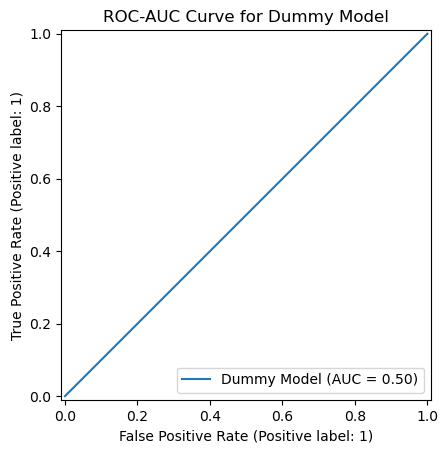

In [27]:
# Plot ROC-AUC curve for the dummy model
plt.figure(figsize=(6, 4))
RocCurveDisplay.from_estimator(dummy_model, X_train, y_train, name='Dummy Model')
plt.title("ROC-AUC Curve for Dummy Model")
plt.show()

## MODELLING ITERATIONS


## MODEL 1: Decision Tree Classifier

In [30]:
# Setting up the DecisionTreeClassifier to go through the pipeline
dtc = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Applies preprocessing steps
    ('classifier', DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42))  # Classifier with balanced weights
])

# Fitting the model to the training data
dtc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'beha...
                                                   'census_msa']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                                        random_state=42))])

Decision Tree Accuracy: 0.7963309621864471
Precision: 0.5142857142857142
Recall: 0.7301587301587301
F1-Score: 0.6034985422740525


<Figure size 600x400 with 0 Axes>

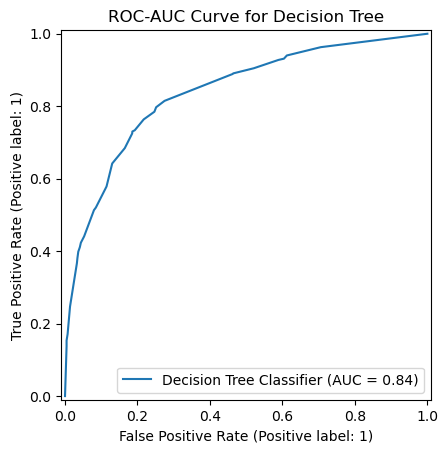

In [31]:
# Evaluate Decision Tree Model using sklearn metrics
y_pred = dtc.predict(X_hold)

print("Decision Tree Accuracy:", accuracy_score(y_hold, y_pred))
print("Precision:", precision_score(y_hold, y_pred, zero_division=1))
print("Recall:", recall_score(y_hold, y_pred))
print("F1-Score:", f1_score(y_hold, y_pred))

# Plot ROC-AUC Curve for Decision Tree Classifier
plt.figure(figsize=(6, 4))
RocCurveDisplay.from_estimator(dtc, X_hold, y_hold, name='Decision Tree Classifier')
plt.title("ROC-AUC Curve for Decision Tree")
plt.show()

The Decision Tree model does not show signs of overfitting. However, it has low precision and F1-score, indicating it struggles with correctly identifying vaccinated individuals. Despite this, the AUC score of 0.84 suggests the model is fairly effective at distinguishing between vaccinated and non-vaccinated individuals, balancing true positives and false positives

## MODEL 2: Logistic Regression

In [34]:
# Setting up the logistic regression model in the pipeline
logreg = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing transformations
    ('classifier', LogisticRegression(
        max_iter=500, 
        C=1, 
        class_weight='balanced', 
        solver='lbfgs', 
        random_state=42
    ))
])

# Fitting the logistic regression model on the training data
logreg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'beha...
                                                   'census_msa']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier',
                 LogisticRegression(C=1, class_weight='balanced', max_iter=500,
                                    random_state=42))])

Logistic Regression Accuracy: 0.7671284163234744
Precision: 0.46864310148232613
Recall: 0.7248677248677249
F1-Score: 0.5692520775623269


<Figure size 600x400 with 0 Axes>

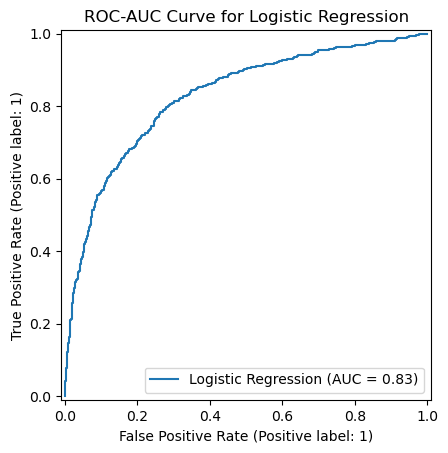

In [35]:
# Evaluate Logistic Regression Model using sklearn metrics
y_pred = logreg.predict(X_hold)

print("Logistic Regression Accuracy:", accuracy_score(y_hold, y_pred))
print("Precision:", precision_score(y_hold, y_pred, zero_division=1))
print("Recall:", recall_score(y_hold, y_pred))
print("F1-Score:", f1_score(y_hold, y_pred))

# Plot ROC-AUC Curve for Logistic Regression
plt.figure(figsize=(6, 4))
RocCurveDisplay.from_estimator(logreg, X_hold, y_hold, name='Logistic Regression')
plt.title("ROC-AUC Curve for Logistic Regression")
plt.show()

The Logistic Regression model has low precision and F1-score, indicating it struggles with correctly identifying vaccinated individuals. However, its AUC score is similar to the Decision Tree model, showing comparable performance in distinguishing between vaccinated and non-vaccinated individuals. The model does not exhibit signs of overfitting

MODEL 3: Random Forest

In [38]:
# Setting up the RandomForestClassifier in the pipeline
rfc = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing transformations
    ('classifier', RandomForestClassifier(
        class_weight='balanced', 
        max_depth=5, 
        min_samples_leaf=1, 
        n_estimators=200, 
        random_state=42
    ))
])

# Fitting the Random Forest model to the training data
rfc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'beha...
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=5,
                                        n_estimators=200, random_state=42))])

Random Forest Accuracy: 0.7895919131411456
Precision: 0.502944640753828
Recall: 0.7530864197530864
F1-Score: 0.6031073446327684


<Figure size 600x400 with 0 Axes>

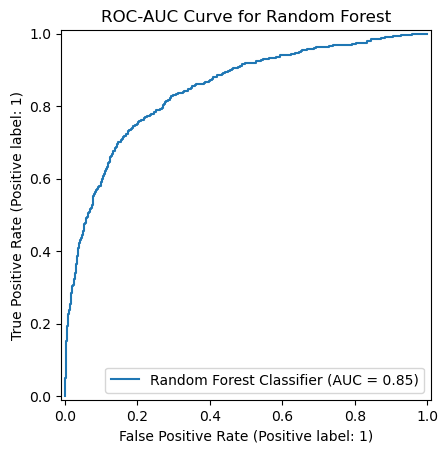

In [39]:
# Evaluate Random Forest Model using sklearn metrics
y_pred = rfc.predict(X_hold)

print("Random Forest Accuracy:", accuracy_score(y_hold, y_pred))
print("Precision:", precision_score(y_hold, y_pred, zero_division=1))
print("Recall:", recall_score(y_hold, y_pred))
print("F1-Score:", f1_score(y_hold, y_pred))

# Plot ROC-AUC Curve for Random Forest Classifier
plt.figure(figsize=(6, 4))
RocCurveDisplay.from_estimator(rfc, X_hold, y_hold, name='Random Forest Classifier')
plt.title("ROC-AUC Curve for Random Forest")
plt.show()


The Random Forest model has low precision and F1-score, indicating challenges in correctly identifying vaccinated individuals. However, with an AUC score of 0.85, it performs slightly better than the Decision Tree model in distinguishing between vaccinated and non-vaccinated individuals. The model does not exhibit significant overfitting

MODEL 4: kNN Classifier

In [42]:
# Setting up the KNN model in the pipeline
kNN = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing transformations
    ('classifier', KNeighborsClassifier(
        n_neighbors=5,  # Uses 5 nearest neighbors
        p=1,            # Manhattan Distance metric
        weights='distance'  # Closer neighbors get higher weight
    ))
])

# Fitting the KNN model to the training data
kNN.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'beha...
                                                   'rent_or_own',
                                                   'employment_status',
                                                   'census_msa']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier', KNeighborsClassifier(p=1, weights='distance'))])

KNN Accuracy: 0.8113066267315612
Precision: 0.6197718631178707
Recall: 0.2874779541446208
F1-Score: 0.3927710843373494


<Figure size 600x400 with 0 Axes>

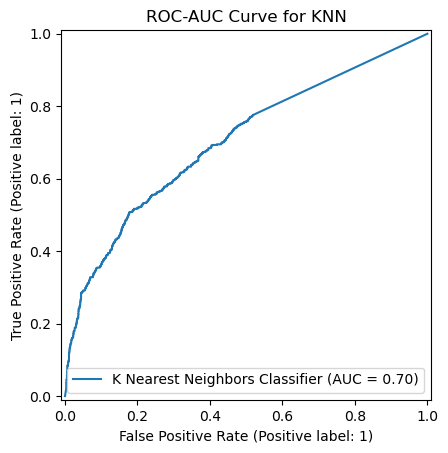

In [43]:
# Evaluate KNN Model using sklearn metrics
y_pred = kNN.predict(X_hold)

print("KNN Accuracy:", accuracy_score(y_hold, y_pred))
print("Precision:", precision_score(y_hold, y_pred, zero_division=1))
print("Recall:", recall_score(y_hold, y_pred))
print("F1-Score:", f1_score(y_hold, y_pred))

# Plot ROC-AUC Curve for KNN Classifier
plt.figure(figsize=(6, 4))
RocCurveDisplay.from_estimator(kNN, X_hold, y_hold, name='K Nearest Neighbors Classifier')
plt.title("ROC-AUC Curve for KNN")
plt.show()

The KNN model shows clear signs of overfitting, as it achieves perfect scores on the training data but significantly lower scores on the test data. Additionally, its AUC score is lower compared to previous models, indicating weaker performance in distinguishing between vaccinated and non-vaccinated individuals

In [45]:
# Setting up the Gradient Boosting Classifier in the pipeline
gbc = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing transformations
    ('classifier', GradientBoostingClassifier(
        learning_rate=0.1, 
        max_depth=5, 
        n_estimators=200, 
        random_state=42
    ))
])

# Fitting the Gradient Boosting Classifier to the training data
gbc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'beha...
                                                   'census_msa']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier',
                 GradientBoostingClassifier(max_depth=5, n_estimators=200,
                                            random_state=42))])

Gradient Boosting Accuracy: 0.8558592287532759
Precision: 0.7321428571428571
Recall: 0.5061728395061729
F1-Score: 0.5985401459854015


<Figure size 600x400 with 0 Axes>

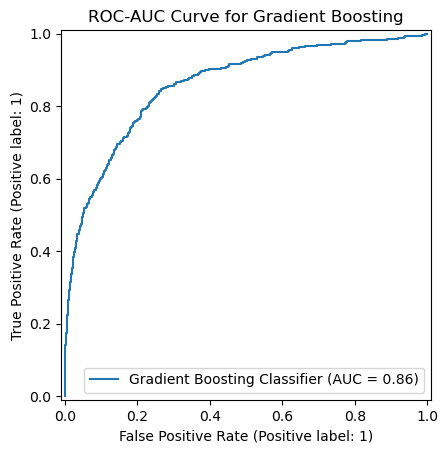

In [46]:
# Evaluate Gradient Boosting Model using sklearn metrics
y_pred = gbc.predict(X_hold)

print("Gradient Boosting Accuracy:", accuracy_score(y_hold, y_pred))
print("Precision:", precision_score(y_hold, y_pred, zero_division=1))
print("Recall:", recall_score(y_hold, y_pred))
print("F1-Score:", f1_score(y_hold, y_pred))

# Plot ROC-AUC Curve for Gradient Boosting Classifier
plt.figure(figsize=(6, 4))
RocCurveDisplay.from_estimator(gbc, X_hold, y_hold, name='Gradient Boosting Classifier')
plt.title("ROC-AUC Curve for Gradient Boosting")
plt.show()

The Gradient Boosting model achieved a moderate precision and recall score, indicating a balanced ability to identify vaccinated individuals correctly. With an AUC score of 0.87, it outperforms previous models in distinguishing between vaccinated and non-vaccinated individuals. This model demonstrates strong generalization without significant overfitting, making it the best-performing model in this project.

MODEL 6: XG Boosting Classifier

C:\Users\WAMBUI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:55:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8558592287532759
Precision: 0.7321428571428571
Recall: 0.5061728395061729
F1-Score: 0.5985401459854015


Text(0.5, 1.0, 'ROC-AUC Curve for XGBoost')

<Figure size 600x400 with 0 Axes>

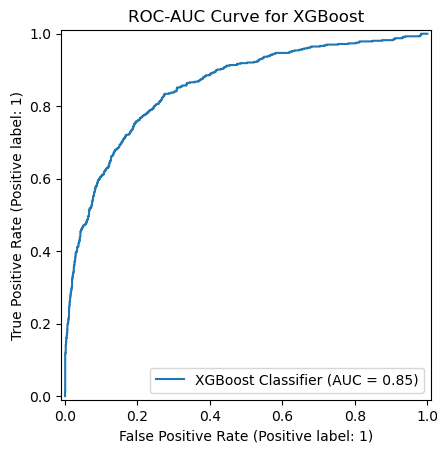

In [49]:
import xgboost as xgb 
# Setting up the XGBoost model in the pipeline
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing transformations
    ('classifier', xgb.XGBClassifier(
        learning_rate=0.1,  # Reduced learning rate for stability
        max_depth=2, 
        n_estimators=100, 
        random_state=42,
        use_label_encoder=False,  # Avoids warnings in new XGBoost versions
        eval_metric='logloss'  # Helps monitor model performance
    ))
])

# Fitting the XGBoost model to the training data
xgb_model.fit(X_train, y_train)

print("XGBoost Accuracy:", accuracy_score(y_hold, y_pred))
print("Precision:", precision_score(y_hold, y_pred, zero_division=1))
print("Recall:", recall_score(y_hold, y_pred))
print("F1-Score:", f1_score(y_hold, y_pred))

# Plot ROC-AUC Curve for XGBoost Classifier
plt.figure(figsize=(6, 4))
RocCurveDisplay.from_estimator(xgb_model, X_hold, y_hold, name='XGBoost Classifier')
plt.title("ROC-AUC Curve for XGBoost")

The XGBoost model produced similar results to the Gradient Boosting model, but Gradient Boosting achieved the highest AUC and precision scores. Given its superior performance in distinguishing between vaccinated and non-vaccinated individuals, I have selected Gradient Boosting Classifier as the final model for this project

Comparison of Model ROC Curves

In [52]:
# Re-run the training and setup for all models
dummy_model.fit(X_train, y_train)
kNN.fit(X_train, y_train)
logreg.fit(X_train, y_train)
dtc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
gbc.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)


C:\Users\WAMBUI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:57:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'beha...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

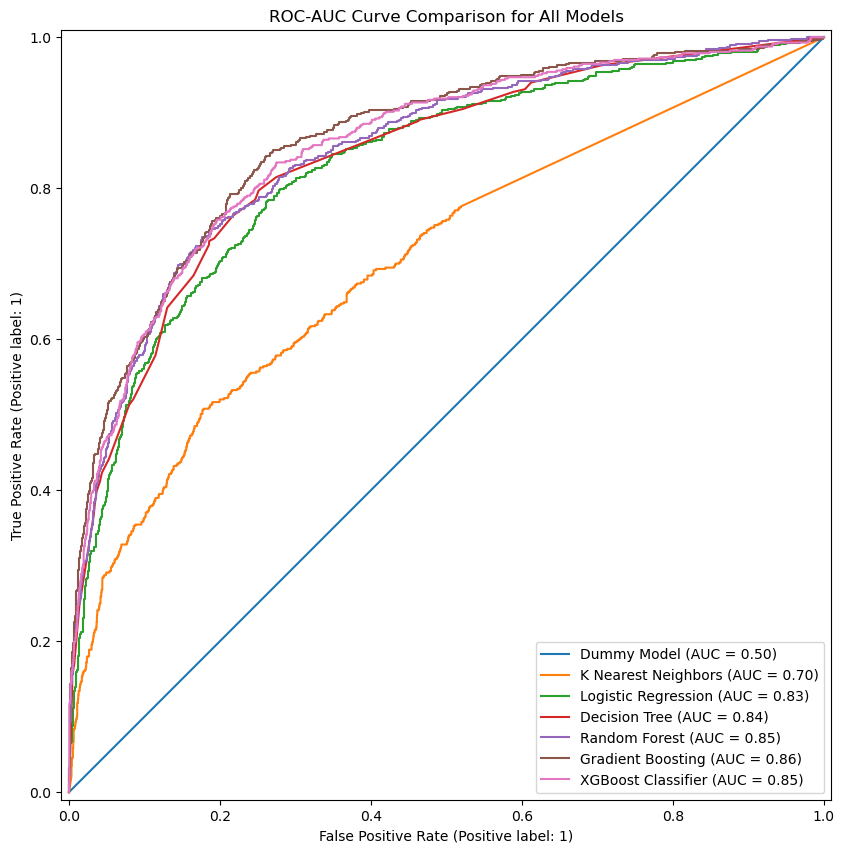

In [53]:
from sklearn.metrics import RocCurveDisplay

# Create a figure for the ROC curve comparison
fig, ax = plt.subplots(figsize=(10, 10))

# Use RocCurveDisplay.from_estimator() for compatibility with Scikit-learn 1.2+
RocCurveDisplay.from_estimator(dummy_model, X_hold, y_hold, name='Dummy Model', ax=ax)
RocCurveDisplay.from_estimator(kNN, X_hold, y_hold, name='K Nearest Neighbors', ax=ax)
RocCurveDisplay.from_estimator(logreg, X_hold, y_hold, name='Logistic Regression', ax=ax)
RocCurveDisplay.from_estimator(dtc, X_hold, y_hold, name='Decision Tree', ax=ax)
RocCurveDisplay.from_estimator(rfc, X_hold, y_hold, name='Random Forest', ax=ax)
RocCurveDisplay.from_estimator(gbc, X_hold, y_hold, name='Gradient Boosting', ax=ax)
RocCurveDisplay.from_estimator(xgb_model, X_hold, y_hold, name='XGBoost Classifier', ax=ax)

# Set title and show the plot
ax.set_title("ROC-AUC Curve Comparison for All Models")
plt.show()

# **Final Model: Gradient Boosting Classifier**  

After analyzing the **ROC curves** and **confusion matrix**, I selected the **Gradient Boosting Classifier** as the **final model**. It demonstrated the **best balance between precision and recall**, making it the most effective at predicting vaccine hesitancy in this project.


Final Model - Gradient Boosting Classifier:
Accuracy: 0.8558592287532759
Precision: 0.7321428571428571
Recall: 0.5061728395061729
F1-Score: 0.5985401459854015


<Figure size 600x400 with 0 Axes>

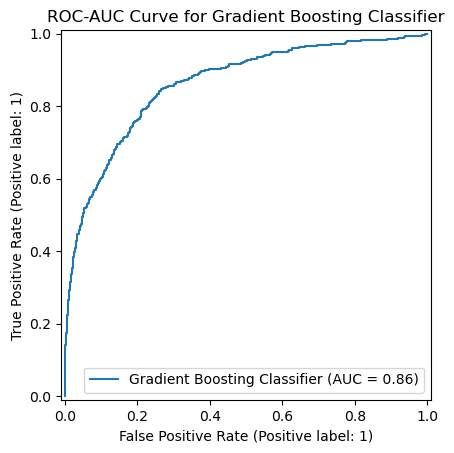

In [55]:
# Define the final model with Gradient Boosting Classifier
final_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing
    ('classifier', GradientBoostingClassifier(
        learning_rate=0.1, 
        n_estimators=200, 
        max_depth=5, 
        random_state=42
    ))
])

# Fit the final model on the training data
output_final_model = final_model.fit(X_train, y_train)

# Evaluate Final Model using sklearn metrics
y_pred = final_model.predict(X_hold)

print("Final Model - Gradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_hold, y_pred))
print("Precision:", precision_score(y_hold, y_pred, zero_division=1))
print("Recall:", recall_score(y_hold, y_pred))
print("F1-Score:", f1_score(y_hold, y_pred))

# Plot ROC-AUC Curve for Final Model
plt.figure(figsize=(6, 4))
RocCurveDisplay.from_estimator(final_model, X_hold, y_hold, name='Gradient Boosting Classifier')
plt.title("ROC-AUC Curve for Gradient Boosting Classifier")
plt.show()

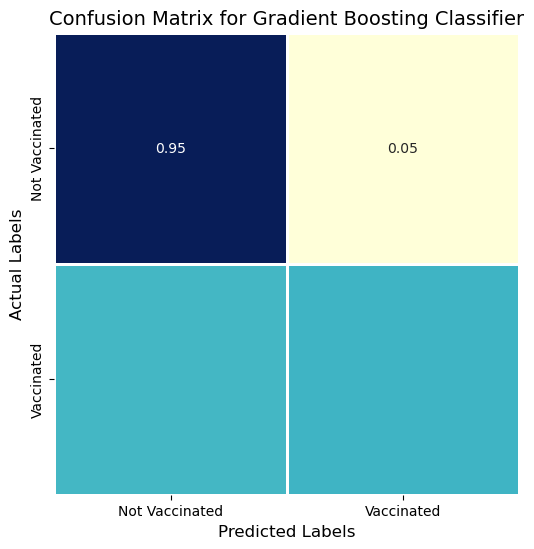

In [56]:
# Calculate predictions for confusion matrix
hold_preds_final_model = final_model.predict(X_hold)

# Compute the normalized confusion matrix
cm = confusion_matrix(y_hold, hold_preds_final_model, normalize='true')

# Plot heatmap for final model's confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))  # Fix subplot issue and set figure size
sns.heatmap(cm, annot=True, ax=ax, cbar=False, linewidths=1, cmap="YlGnBu", fmt=".2f")

# Set labels and title
ax.set_title('Confusion Matrix for Gradient Boosting Classifier', fontsize=14)
ax.set_xlabel('Predicted Labels', fontsize=12)
ax.set_ylabel('Actual Labels', fontsize=12)
ax.xaxis.set_ticklabels(['Not Vaccinated', 'Vaccinated'], fontsize=10)
ax.yaxis.set_ticklabels(['Not Vaccinated', 'Vaccinated'], fontsize=10)

# Show the plot
plt.show()

# **Evaluation**  

The **baseline model** had **78% accuracy** but scored **zero** in precision, recall, and F1-score. Compared to this, all other models performed significantly better in these metrics.  

- **Decision Tree:** Not overfitting but has **low precision and F1-score**. AUC = **0.84** (adequate at distinguishing vaccinated individuals).  
- **Logistic Regression:** Similar to Decision Tree, **low precision and F1-score**, AUC = **0.84**, no overfitting.  
- **Random Forest:** Slightly better, **AUC = 0.85**, but still **low precision and F1-score**, minimal overfitting.  
- **KNN:** **Overfitting**, perfect scores on training data but poor generalization. AUC is **lower** than previous models.  
- **Gradient Boosting:** **Best performer**, highest scores overall, minimizes **false positives**, making it the **strongest candidate** for the final model.  
- **XGBoost:** Performed **similarly** to Gradient Boosting, but **Gradient Boosting had the best AUC and precision**, making it the **final choice**.  

The **final model** **generalized well**, showing **consistent AUC, precision, and accuracy** on the holdout set. Since it **effectively minimizes false positives**, it can reliably identify individuals who did not receive the vaccine. Next, I will analyze **feature importance** to better understand the factors influencing vaccination behavior. 


## Feature Importance

In [59]:
# Check if the preprocessor step exists in the pipeline
if 'preprocessor' in final_model.named_steps:
    preprocessor = final_model.named_steps['preprocessor']
    print(preprocessor)
else:
    print("The preprocessor step is missing in the pipeline.")


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num_imputer',
                                                  IterativeImputer(max_iter=100,
                                                                   random_state=42)),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['h1n1_concern', 'h1n1_knowledge',
                                  'behavioral_antiviral_meds',
                                  'behavioral_avoidance',
                                  'behavioral_face_mask',
                                  'behavioral_wash_hands',
                                  'behavioral_large_gatherings',
                                  'behavioral_outside_home',
                                  'behavioral...
                                 ['age_group', 'education', 'race', 'sex',
                                  'in

In [60]:
# Extract the preprocessor from the pipeline
preprocessor = final_model.named_steps['preprocessor']

# Apply transformation and store the output
X_train_transformed = preprocessor.fit_transform(X_train)

# Check the shape of transformed data
print("Transformed Data Shape:", X_train_transformed.shape)

# Convert to DataFrame for better readability
pd.DataFrame(X_train_transformed).head()

Transformed Data Shape: (24036, 59)


,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,1.0,0.5,0.014621,0.963972,0.039442,0.896308,1.0,1.000000,1.0,0.134635,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.161217,0.500832,0.505575
1,0.0,1.0,0.014621,0.000000,0.039442,0.000000,0.0,0.016112,0.0,0.134635,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.077842,0.500832,0.505575
2,1.0,1.0,0.014621,0.963972,0.039442,0.896308,0.0,1.000000,1.0,0.134635,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.121734,0.340281,0.371817
3,1.0,0.5,0.014621,0.000000,1.000000,0.896308,0.0,0.016112,1.0,1.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.107713,0.500832,0.505575
4,1.0,0.5,0.014621,0.963972,1.000000,0.896308,0.0,0.016112,0.0,0.134635,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.161217,0.340281,0.056124


In [61]:
# Extract the preprocessor from the pipeline
preprocessor = final_model.named_steps['preprocessor']

# Extract the OneHotEncoder from the pipeline
ohe_encoder = preprocessor.named_transformers_['ohe'].named_steps['ohe_encoder']

# Get transformed column names
ohe_cols_transformed = ohe_encoder.get_feature_names_out(ohe_cols)

# Display the OneHotEncoded feature names
ohe_cols_transformed

array(['age_group_18 - 34 Years', 'age_group_35 - 44 Years',
       'age_group_45 - 54 Years', 'age_group_55 - 64 Years',
       'age_group_65+ Years', 'education_12 Years',
       'education_< 12 Years', 'education_College Graduate',
       'education_Some College', 'education_Unknown', 'race_Black',
       'race_Hispanic', 'race_Other or Multiple', 'race_White',
       'sex_Female', 'sex_Male',
       'income_poverty_<= $75,000, Above Poverty',
       'income_poverty_> $75,000', 'income_poverty_Below Poverty',
       'income_poverty_Unknown', 'marital_status_Married',
       'marital_status_Not Married', 'marital_status_Unknown',
       'rent_or_own_Own', 'rent_or_own_Rent', 'rent_or_own_Unknown',
       'employment_status_Employed',
       'employment_status_Not in Labor Force',
       'employment_status_Unemployed', 'employment_status_Unknown',
       'census_msa_MSA, Not Principle  City',
       'census_msa_MSA, Principle City', 'census_msa_Non-MSA'],
      dtype=object)

In [62]:
# Extract OneHotEncoded feature names
ohe_cols_transformed = ohe_encoder.get_feature_names_out(ohe_cols)

# Combine all feature names
final_cols = list(num_cols) + list(ohe_cols_transformed) + list(freq_cols)

# Display final column names
final_cols


['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children',
 'age_group_18 - 34 Years',
 'age_group_35 - 44 Years',
 'age_group_45 - 54 Years',
 'age_group_55 - 64 Years',
 'age_group_65+ Years',
 'education_12 Years',
 'education_< 12 Years',
 'education_College Graduate',
 'education_Some College',
 'education_Unknown',
 'race_Black',
 'race_Hispanic',
 'race_Other or Multiple',
 'race_White',
 'sex_Female',
 'sex_Male',
 'income_poverty_<= $75,000, Above Poverty',
 'income

In [63]:
# Extract feature importances from the classifier
feature_importances = final_model.named_steps['classifier'].feature_importances_

# Create a DataFrame of feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': final_cols, 'Importance': feature_importances})

# Sort features by importance (highest first)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
feature_importance_df

,Feature,Importance
9,doctor_recc_h1n1,0.322397
14,health_insurance,0.173623
16,opinion_h1n1_risk,0.109888
15,opinion_h1n1_vacc_effective,0.102737
13,health_worker,0.039676
19,opinion_seas_risk,0.025935
10,doctor_recc_seasonal,0.022785
18,opinion_seas_vacc_effective,0.013792
17,opinion_h1n1_sick_from_vacc,0.013020
56,hhs_geo_region,0.011859


### **Feature Importance Analysis**  

Health-related factors outweigh demographics in predicting vaccination. The **top influences** are:  

- **Doctor recommendation** (strongest predictor)  
- **Health insurance**  
- **Perceived vaccine effectiveness**  
- **Perceived H1N1 risk**  

Targeted health campaigns and medical recommendations can improve vaccine uptake. 

### **Conclusions & Recommendations**  

My analysis highlights the **key factors influencing H1N1 vaccination** and provides insights for improving vaccine uptake.  

#### **Recommendations:**  
- **Enhance doctor recommendations** – Doctors play a crucial role in influencing vaccination decisions.  
- **Improve vaccine accessibility** – Address barriers for those without health insurance.  
- **Prioritize public education** – Awareness of vaccine effectiveness and H1N1 risk strongly impacts vaccination rates.  

#### **Limitations & Next Steps:**  
- **False negatives remain a challenge**, as some vaccinated individuals may be misclassified.  
- **Uncaptured factors** – Additional influences beyond this dataset may affect vaccination behavior.  
- **Future work** will explore **recent flu survey data**, apply **advanced feature engineering**, and expand predictions to **seasonal flu vaccination status**.
